In [1]:
#Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text cleaning
import re, string
import nltk
import scapy
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from textblob import TextBlob
nltk.download('stopwords')
#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#transformers
#import transformers
#from transformers import BertModel
#from transformers import BertTokenizer
#from transformers import AdamW, get_linear_schedule_with_warmup

#PyTorch LSTM
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
#torch.manual_seed(seed_value)
#torch.cuda.manual_seed_all(seed_value)

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

#os and warnings
import os
import random
import warnings
os.environ['KMP_DUPLICATE_LIB_OK']='True'
warnings.filterwarnings('ignore')
nltk.download('punkt')


from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score , recall_score
#from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer
#from transformers.data.processors import SingleSentenceClassificationProcessor
#from transformers import Trainer , TrainingArguments
#from transformers.trainer_utils import EvaluationStrategy
#from transformers.data.processors.utils import InputFeatures
#from torch.utils.data import Dataset
#from torch.utils.data import DataLoader
#from sklearn.utils import resample

import logging

logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)

c:\Users\oessa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oessa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oessa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 432x288 with 0 Axes>

In [7]:
df_train = pd.read_csv("BRAD_train.csv",)
df_test = pd.read_csv("BRAD_dev.csv",)
#df.columns = ['label' , 'ID1' , 'ID2' , 'ID3' , 'sentence']

df_train.head()

,label,content
0,0,قصص فكر جمل كتب خطء سلب شرح سهب لكل قصه عده زي...
1,1,امل الا تخر نسي جهل صرف كون لكن علم فكر بصر صر...
2,0,ايه قنديل عهد منك سلب بخس داء كنت تحف سلب سرد ...
3,0,ريه حد ذات بدي وصل ثلث نهي اشه كوس جدا شدد ليه...
4,0,نجم كنت حطت يعن جرب كتب وقل اشي ندم لسه بدر او...


In [4]:
df_train.label.value_counts()

0    54173
1    51383
Name: label, dtype: int64

In [10]:
x_train = df_train["content"]
y_train = df_train["label"]

x_test = df_test["content"]
y_test = df_test["label"]


y_train

0         0
1         1
2         0
3         0
4         0
         ..
105551    0
105552    0
105553    0
105554    0
105555    0
Name: label, Length: 105556, dtype: int64

# TF-IDF

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer() 


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

LR_Classifier = LogisticRegression()

lr_pipe=make_pipeline(vectorizer,LR_Classifier)
lr_pipe.fit(x_train,y_train)
lr_y_pred=lr_pipe.predict(x_test)

lr_y_pred[1]

1

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy score: " , accuracy_score(y_test,lr_y_pred))
print("Recall score: " ,recall_score(y_test,lr_y_pred))
print("Precision score: " ,precision_score(y_test,lr_y_pred))
print("F1 score: " ,f1_score(y_test,lr_y_pred))

Accuracy score:  0.7955286093217128
Recall score:  0.8009060196560197
Precision score:  0.7881970681577755
F1 score:  0.7945007235890016


In [15]:
from sklearn.metrics import classification_report
report = classification_report(y_test, lr_y_pred, output_dict=True)
report

{'0': {'precision': 0.8029036181210094,
  'recall': 0.7902887924584767,
  'f1-score': 0.7965462634793755,
  'support': 13366},
 '1': {'precision': 0.7881970681577755,
  'recall': 0.8009060196560197,
  'f1-score': 0.7945007235890016,
  'support': 13024},
 'accuracy': 0.7955286093217128,
 'macro avg': {'precision': 0.7955503431393924,
  'recall': 0.7955974060572482,
  'f1-score': 0.7955234935341886,
  'support': 26390},
 'weighted avg': {'precision': 0.7956456375707569,
  'recall': 0.7955286093217128,
  'f1-score': 0.7955367480745923,
  'support': 26390}}

In [16]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

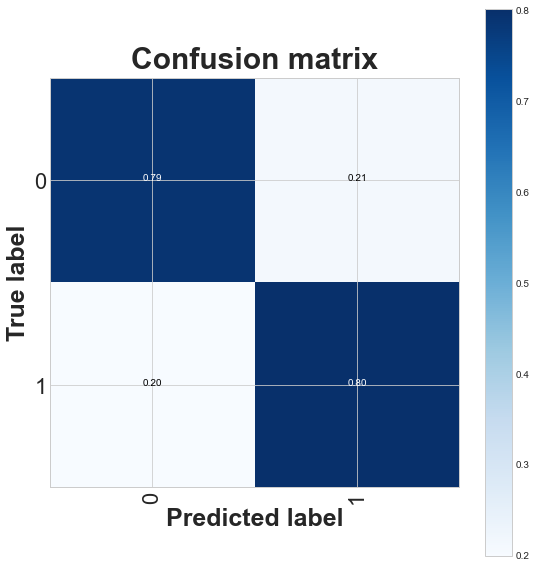

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cnf_matrix = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes={0,1}, title="Confusion matrix")
plt.show()